In [1]:
import cv2
import numpy as np

In [3]:
img = cv2.imread('code_jeje_yang/Submit/images/DZ6079a_02A05 DAPI 10x.tif', 0)
edges1 = cv2.Canny(img, 10, 100)
edges2 = cv2.Canny(img, 10, 150)
cv2.imshow('edges1', edges2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
img = cv2.imread('dog.jpg', 0)
img = cv2.resize(img, (500, 500))

h, w = img.shape
# calculate the center of the image
center = (w / 2, h / 2)
 
angle90 = 90
 
scale = 1.0
 
# Perform the counter clockwise rotation holding at the center
# 90 degrees
M = cv2.getRotationMatrix2D(center, angle90, scale)
rotated90 = cv2.warpAffine(img, M, (h, w))

cv2.imwrite("resize.png", rotated90)

True

In [22]:
blur = cv2.GaussianBlur(img,(15,15),0)
edges = cv2.Canny(img,100,200)

In [23]:
cv2.imshow('blur', edges)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
def gaussian_kernel(size, sigma=0.25):
        size = int(size) // 2
        x, y = np.mgrid[-size:size+1, -size:size+1]
        normal = 1 / (2.0 * np.pi * sigma**2)
        g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
        return g
sum(sum(gaussian_kernel(3)))    

2.549897230013212

In [200]:
img = cv2.imread('code_jeje_yang/Submit/images/DZ6079a_02A05 DAPI 10x.tif', 0)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny = cannyEdgeDetector(img)
canny.detect()
print(canny.thresholdImg)
cv2.imwrite("img_final.png", canny.img_final)

[[ 0.      0.      0.     ... 71.6    45.      0.    ]
 [90.      0.6797  0.2266 ... 45.     18.44    0.    ]
 [90.      1.573   1.124  ... 30.98   30.98   45.    ]
 ...
 [89.56   89.3    89.8    ...  0.      0.      0.    ]
 [89.8    89.56   90.     ...  0.      0.2249  0.6743]
 [ 0.     89.3    90.     ...  0.      0.2266  0.6797]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


True

In [187]:
a = canny.nonMaxImg
a = a.astype(np.int8)
np.min(a)

-128

In [201]:
cv2.imwrite("img_final.png", canny.img_final)

True

In [199]:
from scipy import ndimage
from scipy.ndimage.filters import convolve

from scipy import misc
import numpy as np

class cannyEdgeDetector:
    def __init__(self, imgs, sigma=1, kernel_size=5, weak_pixel=50, strong_pixel=255, lowthreshold=0.027709,
                 highthreshold=0.069272):
        self.imgs = imgs
        self.imgs_final = []
        self.img_smoothed = None
        self.gradientMat = None
        self.thetaMat = None
        self.nonMaxImg = None
        self.thresholdImg = None
        self.weak_pixel = weak_pixel
        self.strong_pixel = strong_pixel
        self.sigma = sigma
        self.kernel_size = kernel_size
        self.lowThreshold = lowthreshold
        self.highThreshold = highthreshold
        self.x = None
        self.y = None
        self.img_final = None
        return 
    
    def gaussian_kernel(self, size, sigma=1):
        size = int(size) // 2
        x, y = np.mgrid[-size:size+1, -size:size+1]
        normal = 1 / (2.0 * np.pi * sigma**2)
        g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
        return g
    
    def sobel_filters(self, img):
        Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
        Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

        Ix = ndimage.filters.convolve(img, Kx)
        self.x = Ix
        
        Iy = ndimage.filters.convolve(img, Ky)
        self.y = Iy

        G = np.hypot(Ix, Iy)
        G = G / G.max() * 255
        theta = np.arctan2(Iy, Ix)
        return (G, theta)
    

    def non_max_suppression(self, img, D):
        M, N = img.shape
        Z = np.zeros((M,N), dtype=np.int32)
        angle = D * 180. / np.pi
        angle[angle < 0] += 180


        for i in range(1,M-1):
            for j in range(1,N-1):
                try:
                    q = 255
                    r = 255

                   #angle 0
                    if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                        q = img[i, j+1]
                        r = img[i, j-1]
                    #angle 45
                    elif (22.5 <= angle[i,j] < 67.5):
                        q = img[i+1, j-1]
                        r = img[i-1, j+1]
                    #angle 90
                    elif (67.5 <= angle[i,j] < 112.5):
                        q = img[i+1, j]
                        r = img[i-1, j]
                    #angle 135
                    elif (112.5 <= angle[i,j] < 157.5):
                        q = img[i-1, j-1]
                        r = img[i+1, j+1]

                    if (img[i,j] >= q) and (img[i,j] >= r):
                        Z[i,j] = img[i,j]
                    else:
                        Z[i,j] = 0


                except IndexError as e:
                    pass

        return Z

    def threshold(self, img):

        highThreshold = 20
        lowThreshold = 5
        M, N = img.shape
        res = np.zeros((M,N), dtype=np.int32)

        weak = np.int32(self.weak_pixel)
        strong = np.int32(self.strong_pixel)

        strong_i, strong_j = np.where(img >= highThreshold)
        zeros_i, zeros_j = np.where(img < lowThreshold)

        weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

        res[strong_i, strong_j] = strong
        res[weak_i, weak_j] = weak

        return (res)

    def hysteresis(self, img):

        M, N = img.shape
        weak = self.weak_pixel
        strong = self.strong_pixel

        for i in range(1, M-1):
            for j in range(1, N-1):
                if (img[i,j] == weak):
                    try:
                        if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                            or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                            or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                            img[i, j] = strong
                        else:
                            img[i, j] = 0
                    except IndexError as e:
                        pass

        return img
    
    def detect(self):
        imgs_final = []
        self.img_smoothed = convolve(img, self.gaussian_kernel(5, self.sigma))
        self.gradientMat, self.thetaMat = self.sobel_filters(self.img_smoothed)
        self.nonMaxImg = self.non_max_suppression(self.gradientMat, self.thetaMat)
        self.thresholdImg = self.threshold(self.nonMaxImg.astype(np.int8))
        self.img_final = self.hysteresis(self.thresholdImg)
#             self.imgs_final.append(img_final)

        return self.imgs_final

In [202]:
canny.thetaMat

array([[0.      , 0.      , 0.      , ..., 1.249   , 0.785   , 0.      ],
       [1.57    , 0.011856, 0.003952, ..., 0.785   , 0.3218  , 0.      ],
       [1.57    , 0.02745 , 0.0196  , ..., 0.5405  , 0.5405  , 0.785   ],
       ...,
       [1.5625  , 1.559   , 1.566   , ..., 0.      , 0.      , 0.      ],
       [1.566   , 1.5625  , 1.57    , ..., 0.      , 0.00392 , 0.011765],
       [0.      , 1.559   , 1.57    , ..., 0.      , 0.003952, 0.011856]],
      dtype=float16)

In [113]:
canny.thresholdImg.shape

(1040, 1388)

In [116]:

cv2.imwrite("thresholdImg.png", canny.thresholdImg)

True

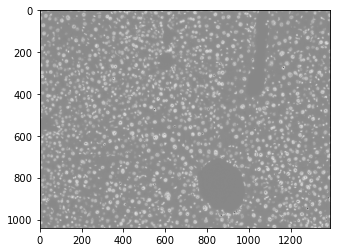

In [83]:
plt.imshow(img.astype(np.int8), cmap=plt.cm.gray)

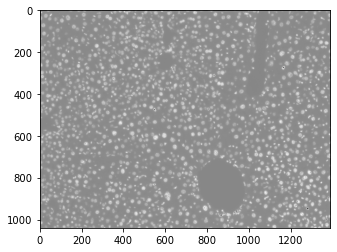

In [84]:
plt.imshow(canny.img_smoothed.astype(np.int8), cmap=plt.cm.gray)

[[  0.    178.2   178.2   ...   2.238   1.      0.   ]
 [  2.828 178.9   178.9   ...   5.      2.238   0.   ]
 [  5.656 180.4   180.4   ...   8.25    4.125   1.   ]
 ...
 [178.2   178.9   180.4   ...   0.      0.      0.   ]
 [178.9   179.6   179.6   ...   0.    180.4   180.4  ]
 [  0.    180.4   179.6   ...   0.    178.9   178.9  ]]


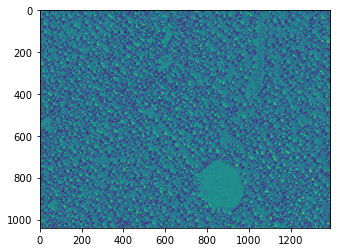

In [75]:
import matplotlib.pyplot as plt
print(canny.gradientMat)
plt.imshow(canny.gradientMat.astype(np.int8), cmap=plt.cm.gray)

In [34]:
def scale_to_0_255(img):
    min_val = np.min(img)
    max_val = np.max(img)
    new_img = (img - min_val) / (max_val - min_val) # 0-1
    new_img *= 255
    return new_img

def my_canny(img, min_val, max_val, sobel_size=3, is_L2_gradient=True):
    """
    Try to implement Canny algorithm in OpenCV tutorial @ https://docs.opencv.org/master/da/d22/tutorial_py_canny.html
    """
    
    #2. Noise Reduction
    smooth_img = cv2.GaussianBlur(img, ksize=(5, 5), sigmaX=1, sigmaY=1)
    
    #3. Finding Intensity Gradient of the Image
    Gx = cv2.Sobel(smooth_img, cv2.CV_64F, 1, 0, ksize=sobel_size)
    Gy = cv2.Sobel(smooth_img, cv2.CV_64F, 0, 1, ksize=sobel_size)
    cv2.imwrite('Gx.jpg', Gx)
    cv2.imwrite('Gy.jpg', Gy)

    if is_L2_gradient:
        edge_gradient = np.sqrt(Gx*Gx + Gy*Gy)
    else:
        edge_gradient = np.abs(Gx) + np.abs(Gy)
    
    angle = np.arctan2(Gy, Gx) * 180 / np.pi
    
    # round angle to 4 directions
    angle = np.abs(angle)
    angle[angle <= 22.5] = 0
    angle[angle >= 157.5] = 0
    angle[(angle > 22.5) * (angle < 67.5)] = 45
    angle[(angle >= 67.5) * (angle <= 112.5)] = 90
    angle[(angle > 112.5) * (angle <= 157.5)] = 135
    cv2.imwrite('edge_gradient1.jpg', edge_gradient)

    #4. Non-maximum Suppression
    keep_mask = np.zeros(smooth_img.shape, np.uint8)
    for y in range(1, edge_gradient.shape[0]-1):
        for x in range(1, edge_gradient.shape[1]-1):
            area_grad_intensity = edge_gradient[y-1:y+2, x-1:x+2] # 3x3 area
            area_angle = angle[y-1:y+2, x-1:x+2] # 3x3 area
            current_angle = area_angle[1,1]
            current_grad_intensity = area_grad_intensity[1,1]
            
            if current_angle == 0:
                if current_grad_intensity > max(area_grad_intensity[1,0], area_grad_intensity[1,2]):
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
            elif current_angle == 45:
                if current_grad_intensity > max(area_grad_intensity[2,0], area_grad_intensity[0,2]):
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
            elif current_angle == 90:
                if current_grad_intensity > max(area_grad_intensity[0,1], area_grad_intensity[2,1]):
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
            elif current_angle == 135:
                if current_grad_intensity > max(area_grad_intensity[0,0], area_grad_intensity[2,2]):
                    keep_mask[y,x] = 255
                else:
                    edge_gradient[y,x] = 0
    cv2.imwrite('edge_gradient.jpg', edge_gradient)
    cv2.imwrite('keep_mask.jpg', keep_mask)

    #5. Hysteresis Thresholding    
    canny_mask = np.zeros(smooth_img.shape, np.uint8)
    canny_mask[(keep_mask>0) * (edge_gradient>min_val)] = 255
    
    return scale_to_0_255(canny_mask)

img = cv2.imread('code_jeje_yang/Submit/images/DZ6079a_02A05 DAPI 10x.tif', 0)
my_canny = my_canny(img, min_val=55, max_val=170)

In [35]:
cv2.imwrite('my_canny.jpg', my_canny)

True

In [1]:
import cv2

In [8]:
bg = cv2.imread('1_MG_5137.png')

In [12]:
img = cv2.imread('_MG_5137-removebg-preview.png', cv2.IMREAD_UNCHANGED)

In [4]:
img.shape

(679, 367, 3)

In [9]:
bg = cv2.resize(bg, (img.shape[1], img.shape[0]))

In [15]:
offset_x = img.shape[1]
offset_y = img.shape[0]
x = 0
y = 0

# alpha channel to create mask from overlap box
alpha_box = img[:, :, 3] / 255.0 
alpha_img = 1 - alpha_box

for c in range(0, 3):
    bg[y:y+offset_y, x:x+offset_x, c] = ((alpha_img*bg[y:y+offset_y, x:x+offset_x, c])
                                      + (alpha_box*img[:, :, c]))

In [16]:
cv2.imshow('img', bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
cv2.imwrite('image.png', bg)

True